# Loading a Dataset

In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import pandas as pd
from torchvision.io import decode_image
import os
from PIL import Image

training_data = datasets.FashionMNIST(
    root="ai-data",
    train=True,
    download=True,
    transform=ToTensor()
)

testing_data = datasets.FashionMNIST(
    root="ai-data",
    train=False,
    download=True,
    transform=ToTensor()
)

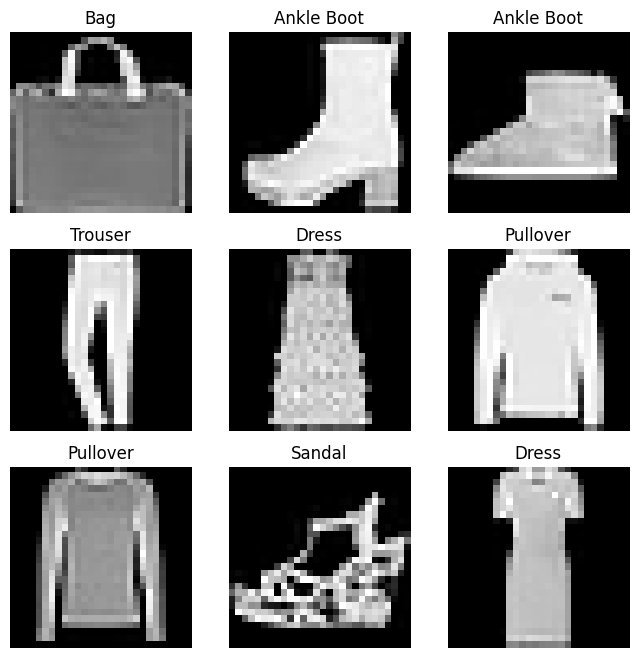

In [2]:
# iterate and visualize the data set
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot"
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

# creating a custom dataset

In [3]:
class CustomImageDataset(Dataset):
    def __init__(self, annotation_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotation_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
        
    # returning the number of samples in the custom dataset
    def __len__(self):
        return len(self.img_labels)
    
    # loads and return a sample from the dataset
    def __getitem__(self, idx):
        img_name = self.img_labels.iloc[idx, 0]
        img_path = os.path.join(self.img_dir, img_name)
        # load the image
        try: 
            image = Image.open(img_path).convert("RGB")
        except FileNotFoundError:
            print(f"Image not found: {img_path}")
        label = self.img_labels.iloc[idx, 1]
        # apply transformation
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

        

# displaying some images in my custom dataset

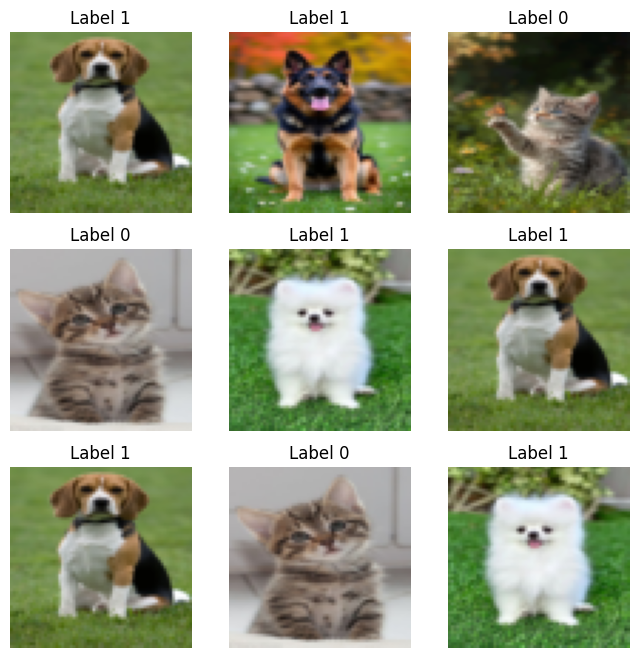

In [5]:
# loading my images in my custom dataset
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

# Initialize the dataset
dataset = CustomImageDataset(
    annotation_file="data/annotations.csv",
    img_dir="data/images",
    transform=transform
)

# Visualize the images
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(dataset), size=(1,)).item()
    img, label = dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(f"Label {label}")
    plt.axis("off")
    plt.imshow(img.permute(1,2,0))
plt.show()
    

# Preparing the data for training

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


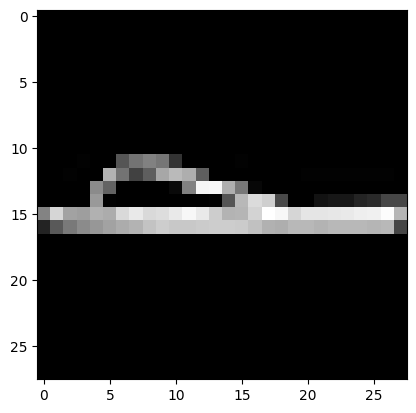

Labels 5


In [57]:
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(testing_data, batch_size=64, shuffle=True)

# display the images and the label
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Labels {label}")